In [1]:
%reload_ext autoreload
%autoreload 2
from PCN_tanh import PCN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plyer import notification
from helpers import get_iris_data

In [2]:
epochs = 100
sample_interval = int(np.ceil(epochs/15))

In [3]:
# Load data from iris and create training and test sets
X_train, X_test, y_train, y_test = get_iris_data()

In [4]:
# Setting up ten agents of PCN
agents = [PCN(4, [6], 3, learning_rate=0.05) for _ in range(10)]

In [5]:
# Training the agents
print('Training the agents...')
# agent_predictions = []
agent_accuracies = []
agent_errors = []
for agent in agents:
    print('Training agent', agents.index(agent))
    # predictions = []
    accuracies = []
    errors = []
    for i in range(epochs):
        if not i % sample_interval:
            _, acc, error = agent.test(X_test, y_test)
            # predictions.append(pred)
            accuracies.append(acc)
            errors.append(np.mean(error))
        agent.train(X_train, y_train)
    # agent_predictions.append(predictions)
    agent_accuracies.append(accuracies)
    agent_errors.append(errors)

Training the agents...
Training agent 0
Training agent 1
Training agent 2
Training agent 3
Training agent 4
Training agent 5
Training agent 6
Training agent 7
Training agent 8
Training agent 9


In [36]:
# Testing agents against test set
print('Testing agents...')
agent_accuracy = []
for agent in agents:
    _, accuracy, _ = agent.test(X_test, y_test)
    agent_accuracy.append(accuracy)

print(f'Average accuracy of agents: {np.mean(agent_accuracy):.3f}')

Testing agents...
Average accuracy of agents: 0.832


In [37]:
# Testing agents against training set
print('Testing agents...')
agent_accuracy = []
for agent in agents:
    _, accuracy, _ = agent.test(X_train, y_train)
    agent_accuracy.append(accuracy)

print(f'Average accuracy of agents: {np.mean(agent_accuracy):.3f}')

Testing agents...
Average accuracy of agents: 0.896


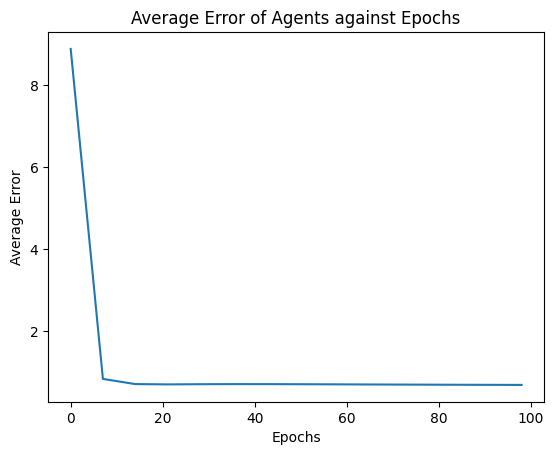

In [9]:
# Calculating the average error of the agents and plotting against epochs
avg_errors = np.mean(agent_errors, axis=0)
plt.plot(range(0, epochs, int(sample_interval)), avg_errors)
plt.title('Average Error of Agents against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.show()

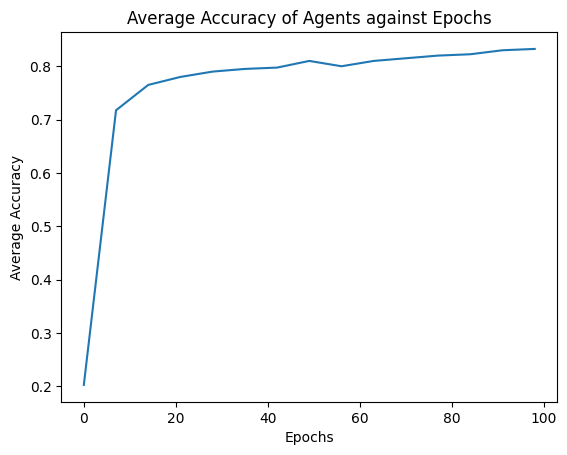

Average accuracy of agents: 0.832


In [16]:
# Calculating the average accuracy of the agents and plotting against epochs
avg_accuracies = np.mean(agent_accuracies, axis=0)
plt.plot(range(0, epochs, int(sample_interval)), avg_accuracies)
plt.title('Average Accuracy of Agents against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.show()
print(f'Average accuracy of agents: {avg_accuracies[-1]:.3f}')

In [31]:
np.argmin(np.array(agent_accuracies)[:, -1])

9

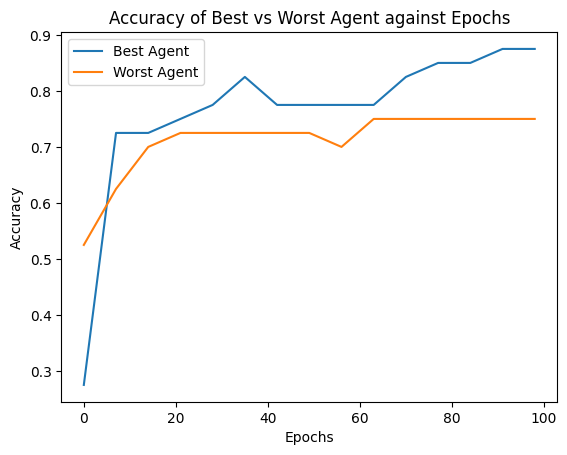

In [34]:
# Plotting performance of the best agent against epochs
best_agent = np.argmax(np.array(agent_accuracies)[:, -1])
worst_agent = np.argmin(np.array(agent_accuracies)[:, -1])
plt.plot(range(0, epochs, int(sample_interval)), agent_accuracies[best_agent])
plt.plot(range(0, epochs, int(sample_interval)), agent_accuracies[worst_agent])
plt.legend(['Best Agent', 'Worst Agent'])
plt.title('Accuracy of Best vs Worst Agent against Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
